# XOR Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import optimize

## Bitwise Operator Dataset

In [10]:
# XOR
# X = np.array([[0,0], [0,1], [1,0], [1,1]])
# y = np.array([[0,1,1,0]]).flatten()

# OR
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0,1,1,1]]).flatten()

# AND
# X = np.array([[0,0], [0,1], [1,0], [1,1]])
# y = np.array([[0,0,0,1]]).flatten()

## Perceptron

In [11]:
def perceptron(X, W, b):
    ## IMPLEMENT HERE
    y= X@W + b # X와 W를 위치를 바꿈
    y = sigmoid(y) #비선형모델
    return y


def sigmoid(z):
    ## IMPLEMENT HERE
    z = 1 / (1+np.exp(-z))
    return z


In [5]:
# t = [0,1,2,3]
# print(t[:-1])

[0, 1, 2]


## Single Perceptron Learning

In [16]:
def bce_loss(weights, args):
    ## IMPLEMENT HERE
    X = args[0]
    y = args[1]

    W, b = weights[:-1], weights[-1]

    y_hat = perceptron(X, W, b)

    ## binary cross entropy  log(0)하면 음의 무한대가 나와서 작은 값 1e-10 작은 값을 넣어줌
    bce = -y * np.log(y_hat + 1e-10) - (1.0 - y) * np.log(1.0 - y_hat)
    loss = bce.mean()

    return loss


result = optimize.minimize(fun = bce_loss, x0 = [0, 0, 0], args=[X, y])

W_opt, b_opt = result.x[:-1], result.x[-1]
y_hat = perceptron(X, W_opt, b_opt)
y_hat_cls = (y_hat > 0.5).astype('int8')


accuracy = accuracy_score(y, y_hat_cls)
print(y)
print(y_hat_cls)
print(f"Accuracy: {accuracy}")

[0 1 1 1]
[0 1 1 1]
Accuracy: 1.0


<ipython-input-16-c3c25c494cdf>:11: RuntimeWarning: divide by zero encountered in log
  bce = -y * np.log(y_hat + 1e-10) - (1.0 - y) * np.log(1.0 - y_hat)
<ipython-input-16-c3c25c494cdf>:11: RuntimeWarning: invalid value encountered in multiply
  bce = -y * np.log(y_hat + 1e-10) - (1.0 - y) * np.log(1.0 - y_hat)
<ipython-input-11-fa45f343b9a7>:10: RuntimeWarning: overflow encountered in exp
  z = 1 / (1+np.exp(-z))
<ipython-input-16-c3c25c494cdf>:11: RuntimeWarning: divide by zero encountered in log
  bce = -y * np.log(y_hat + 1e-10) - (1.0 - y) * np.log(1.0 - y_hat)
<ipython-input-16-c3c25c494cdf>:11: RuntimeWarning: invalid value encountered in multiply
  bce = -y * np.log(y_hat + 1e-10) - (1.0 - y) * np.log(1.0 - y_hat)
<ipython-input-11-fa45f343b9a7>:10: RuntimeWarning: overflow encountered in exp
  z = 1 / (1+np.exp(-z))
<ipython-input-11-fa45f343b9a7>:10: RuntimeWarning: overflow encountered in exp
  z = 1 / (1+np.exp(-z))
<ipython-input-16-c3c25c494cdf>:11: RuntimeWarning: divid

<ipython-input-11-fa45f343b9a7>:10: RuntimeWarning: overflow encountered in exp
  z = 1 / (1+np.exp(-z))


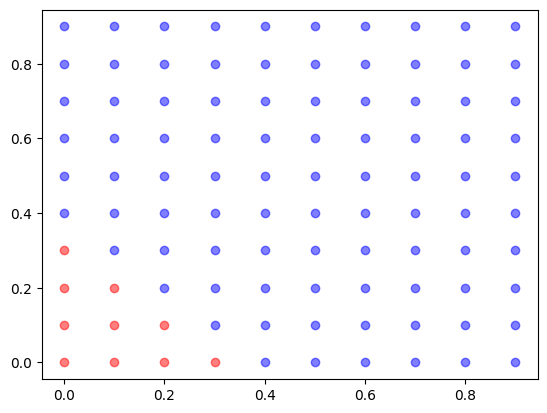

In [17]:
## visualization
color = ['red', 'blue']
for x0 in np.arange(0,1,0.1):
    for x1 in np.arange(0,1,0.1):
        x = np.array([x0, x1])
        y_hat = perceptron(x, W_opt, b_opt)
        y_hat_cls = (y_hat > 0.5).astype('int8')
        plt.scatter(x0, x1, c=color[y_hat_cls], alpha=0.5)

plt.show()

## Multiple Perceptrons Learning

In [28]:
w11 = np.array([5, 5])
w12 = np.array([-7, -7])
w2 = np.array([-15, -15])
b1 = -8
b2 = 3
b3 = 6

def predict(x):
    ## IMPLEMENT HERE
    y1 = perceptron(x, w11, b1)
    y2 = perceptron(x, w12, b2)
    x2 = np.array([y1, y2])

    y_hat = perceptron(x2, w2, b3)

    return y_hat, x2



### Analysis of multiple perceptron

[0 0] => 0
[0 1] => 1
[1 0] => 1
[1 1] => 0


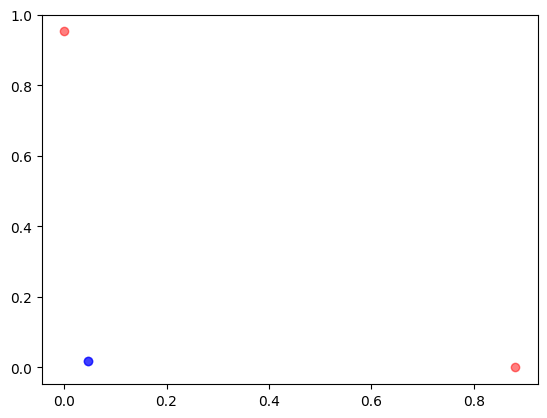

In [29]:
# multiple perceptron
color = ['red', 'blue']
for x in X:
    y_hat, layer_x2 = predict(x)
    y_hat_cls = (y_hat > 0.5).astype('int8')
    print(f'{x} => {y_hat_cls}')
    plt.scatter(layer_x2[0], layer_x2[1], c=color[y_hat_cls], alpha=0.5)

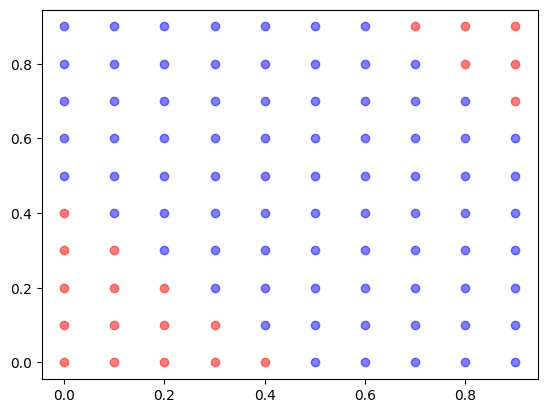

In [30]:
color = ['red', 'blue']
for x0 in np.arange(0,1,0.1):
    for x1 in np.arange(0,1,0.1):
        x = np.array([x0, x1])
        y_hat, layer_x2 = predict(x)
        y_hat_cls = (y_hat > 0.5).astype('int8')
        plt.scatter(x0, x1, c=color[y_hat_cls], alpha=0.5)

plt.show()